In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Print Measurement table to understand data you are working with.
import pandas as pd
df_measurement = pd.read_sql('select * from measurement', engine)
df_measurement.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [11]:
# Print Station table to understand data you are working with.
df_station = pd.read_sql('select * from station', engine)
df_station.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


# Precipitation Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. (Last date recorded is 2017-08-23, so use last 12 months of data in set: August 1, 2016 to August 1, 2017)
prcp_query = session.query(measurement.date, measurement.prcp).filter(measurement.date.between('2016-08-01', '2017-08-01'))

In [13]:
# Save the query results as a Pandas DataFrame 
prcp_df = pd.DataFrame(prcp_query,columns=['date', 'prcp'])

# Set the index to the date column
prcp_df.set_index('date', inplace=True)

# Sort the dataframe by date
prcp_df = prcp_df.sort_values(by='date', ascending=True)

print(prcp_df)

            prcp
date            
2016-08-01  0.08
2016-08-01  3.53
2016-08-01   NaN
2016-08-01  2.21
2016-08-01  2.35
2016-08-01  0.54
2016-08-02  0.05
2016-08-02  1.14
2016-08-02  0.83
2016-08-02  0.00
2016-08-02  0.07
2016-08-02  0.55
2016-08-02  0.20
2016-08-03  0.02
2016-08-03  0.00
2016-08-03   NaN
2016-08-03  0.02
2016-08-03  0.00
2016-08-03  0.01
2016-08-03  0.00
2016-08-04   NaN
2016-08-04  0.62
2016-08-04  0.04
2016-08-04  0.77
2016-08-04  0.25
2016-08-04  0.13
2016-08-05   NaN
2016-08-05  0.03
2016-08-05  0.01
2016-08-05  0.27
...          ...
2017-07-27  0.00
2017-07-28  0.00
2017-07-28  0.40
2017-07-28  0.01
2017-07-28  0.00
2017-07-28  0.09
2017-07-28  0.13
2017-07-28  0.14
2017-07-29  0.30
2017-07-29  0.00
2017-07-29  0.23
2017-07-29  0.06
2017-07-29  0.00
2017-07-29  0.02
2017-07-30  0.30
2017-07-30  0.00
2017-07-30  0.00
2017-07-30  0.00
2017-07-30  0.00
2017-07-31   NaN
2017-07-31  0.00
2017-07-31   NaN
2017-07-31  0.00
2017-07-31  0.00
2017-07-31  0.00
2017-07-31  0.

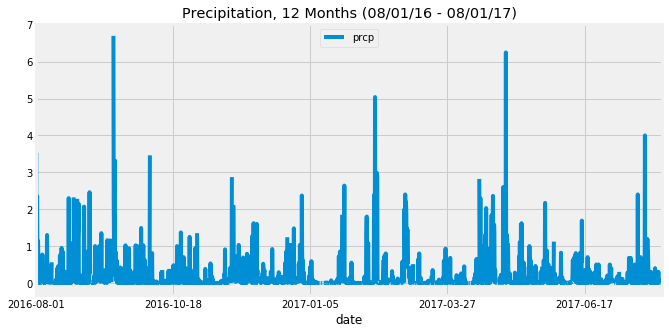

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(title="Precipitation, 12 Months (08/01/16 - 08/01/17)", figsize=(10, 5))
plt.legend(loc='upper center')
plt.savefig("precipitation.png")
plt.show()

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2070.000000
mean,0.187353
std,0.474850
min,0.000000
25%,0.000000
50%,0.020000
75%,0.140000
max,6.700000


# Station Analysis

In [16]:
# Design a query to show how many stations are available in this dataset?
unique_stations_query = session.query(measurement.station).distinct().count()
print(unique_stations_query)

9


In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order by using group by.

stations_byactivity_query = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
print(stations_byactivity_query)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [18]:
# Which station has the highest number of observations?
most_active_station = stations_byactivity_query[0][0]

print(f"The station with the highest number of observations is: {most_active_station}.")

The station with the highest number of observations is: USC00519281.


In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded (min), 
# highest temperature recorded (max), and average temperature (avg) for the most active station, 'USC00519281'.

most_active_station_temps = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == "USC00519281").all()
print(most_active_station_temps)

[(54.0, 85.0, 71.66378066378067)]


In [20]:
# Now that you've tested the query, print results.

print(f"Temperatures for Most Active Station (USC00519281)")
print(f"Lowest: {most_active_station_temps[0][0]}, Highest: {most_active_station_temps[0][1]}, Average: {most_active_station_temps[0][2]}")


Temperatures for Most Active Station (USC00519281)
Lowest: 54.0, Highest: 85.0, Average: 71.66378066378067


In [21]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station

from sqlalchemy import and_
mostactive_12motemps_query = session.query(measurement.station, measurement.tobs).filter(and_(measurement.date.between('2016-08-01', '2017-08-01'), measurement.station == 'USC00519281'))

In [27]:
# Save the query results as a Pandas DataFrame 
mostactive_12motemps_query_df = pd.DataFrame(mostactive_12motemps_query,columns=['station', 'tobs'])

# Set the index to the date column
#mostactive_12motemps_query_df.set_index('date', inplace=True)

# Sort the dataframe by date
#mostactive_12motemps_query_df = mostactive_12motemps_query_df.sort_values(by='date', ascending=True)

print(mostactive_12motemps_query_df)

         station  tobs
0    USC00519281  76.0
1    USC00519281  76.0
2    USC00519281  77.0
3    USC00519281  77.0
4    USC00519281  81.0
5    USC00519281  78.0
6    USC00519281  78.0
7    USC00519281  81.0
8    USC00519281  81.0
9    USC00519281  82.0
10   USC00519281  80.0
11   USC00519281  76.0
12   USC00519281  80.0
13   USC00519281  76.0
14   USC00519281  75.0
15   USC00519281  74.0
16   USC00519281  82.0
17   USC00519281  80.0
18   USC00519281  79.0
19   USC00519281  81.0
20   USC00519281  79.0
21   USC00519281  78.0
22   USC00519281  77.0
23   USC00519281  77.0
24   USC00519281  80.0
25   USC00519281  80.0
26   USC00519281  75.0
27   USC00519281  73.0
28   USC00519281  78.0
29   USC00519281  77.0
..           ...   ...
335  USC00519281  81.0
336  USC00519281  76.0
337  USC00519281  78.0
338  USC00519281  77.0
339  USC00519281  74.0
340  USC00519281  75.0
341  USC00519281  78.0
342  USC00519281  78.0
343  USC00519281  69.0
344  USC00519281  72.0
345  USC00519281  74.0
346  USC005

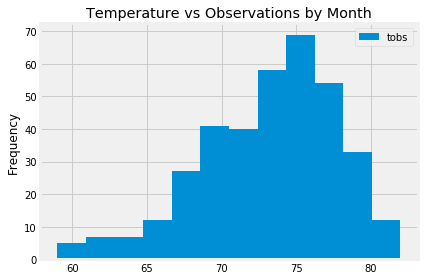

<Figure size 432x288 with 0 Axes>

In [28]:
#  Plot the results as a histogram. Use .hist and 1 bin for each month.
mostactive_12motemps_query_df.plot.hist(bins=12, title="Temperature vs Observations by Month")
plt.tight_layout()
plt.show()
plt.savefig("temps_vs_observations.png")

# Climate App

In [ ]:
# Now that you have completed your initial analysis, design a Flask API based on the queries that you have just developed. Use FLASK to create your routes.


Routes
/

Home page.

List all routes that are available.

/api/v1.0/precipitation


Convert the query results to a Dictionary using date as the key and prcp as the value.


Return the JSON representation of your dictionary.


/api/v1.0/stations
Return a JSON list of stations from the dataset.



/api/v1.0/tobs

query for the dates and temperature observations from a year from the last data point.
Return a JSON list of Temperature Observations (tobs) for the previous year.



/api/v1.0/<start> and /api/v1.0/<start>/<end>


Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.


When given the start only, calculate TMIN, TAVG, and TMAX for all dates greater than and equal to the start date.


When given the start and the end date, calculate the TMIN, TAVG, and TMAX for dates between the start and end date inclusive.







In [ ]:
# 1. Import Flask
from flask import Flask

# 2. Create an app, being sure to pass __name__ (boilerplate)
app = Flask(__name__)

# 3. Define what to do when a user hits the index route
@app.route("/")
def home():
    print("Server received request for 'Hawaii Climate' page...")
    return "Welcome to my 'Hawaii Climate' page!"

# 4. Define what to do when a user hits the /precipitation route
@app.route("/api/v1.0/precipitation")
def about():
    print("Server received request for 'Precipitation' page...")
    return "Welcome to my 'Precipitation' page!"

if __name__ == "__main__":
    app.run(debug=True)


In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip = calc_temps('2017-08-01', '2017-08-15')
print(trip)

In [ ]:
# Put data into a data frame using Pandas
trip_temp_df = pd.DataFrame(trip, columns=['tmin', 'tavg', 'tmax'])
trip_temp_df

In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

